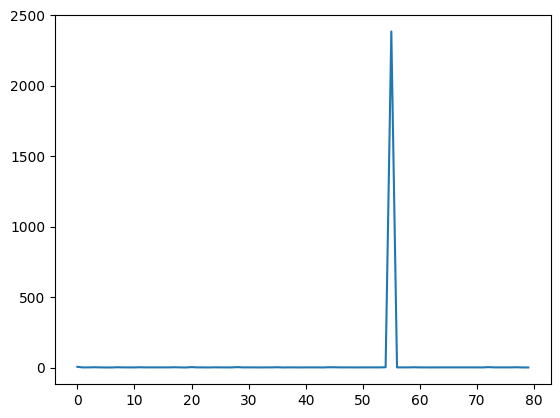

In [18]:
import time
import numpy as np

# Naive recursion
def F_naive(n):
    if n == 0 or n == 1:
        return n
    else:
        return F_naive(n-1)+F_naive(n-2)

# Dynamic Programming
def F_dp(n):
    memo = [0, 1] + [0] * (n-1)
    for i in range(2, n+1):
        memo[i] = memo[i-1] + memo[i-2]
    return memo[n]

# Test both functions
epsilon = 1e-10
lst = []
for n in range(80):


    naive_start = time.time()
    naive_end = time.time()

    start = time.time()
    end = time.time()


    lst.append(round(((naive_end - naive_start)*epsilon) / ((end - start) * epsilon), 2))


import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=range(80), y=lst)
plt.show()

